In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

from IPython.display import display, HTML

%matplotlib inline

### Vehicle Level Metrics

In [7]:
veh_model = pd.read_csv('Helper_Files/model.csv')
veh_make = pd.read_csv('Helper_Files/make.csv')
vehicles_raw = pd.read_csv('FARS2017NationalCSV/vehicle.csv')
states = pd.read_csv('Helper_Files/states.csv')

In [8]:
def merge_check(df, drop_merge_col=True):
    display(df['_merge'].value_counts())
    
    if drop_merge_col:
        df.drop(columns=['_merge'],inplace=True) 
    
    return df

In [9]:
vehicles = vehicles_raw.merge(states, 
                              how='left', 
                              left_on='STATE', 
                              right_on='Code',
                              indicator=True)

vehicles = merge_check(vehicles)

vehicles['MAKE'] = vehicles['MAKE'].astype(str)
veh_make['Code'] = veh_make['Code'].astype(str)

vehicles = vehicles.merge(veh_make, 
                          how='inner', 
                          left_on='MAKE', 
                          right_on='Code',
                          indicator=True)

vehicles = merge_check(vehicles)

vehicles['MODEL'] = vehicles['MODEL'].astype(str)
veh_model['Code'] = veh_model['Code'].astype(str)

vehicles = vehicles.merge(veh_model, 
                          how='inner', 
                          left_on='MODEL', 
                          right_on='Code',
                          indicator=True)

vehicles = merge_check(vehicles)

def code_splitter(row):
    if '-' in row['Code']:
        range_values = row['Code'].split('-')
        return list(range(int(range_values[0]),int(range_values[1])))
    else:
        return row['Code']

#if [Code] <= number <= ['Code2']:
#Code 1 is start code, Code 2 is stop code - in between those than type = model

veh_model['Code2'] = veh_model.apply(code_splitter, axis=1)

vehicles = vehicles.drop(columns=['Code_x', 'Code_y'])

both          52645
left_only         0
right_only        0
Name: _merge, dtype: int64

both          52138
left_only         0
right_only        0
Name: _merge, dtype: int64

both          52138
left_only         0
right_only        0
Name: _merge, dtype: int64

In [10]:
vehicles.head()

,STATE,ST_CASE,VEH_NO,VE_FORMS,NUMOCCS,DAY,MONTH,HOUR,MINUTE,HARM_EV,MAN_COLL,UNITTYPE,HIT_RUN,REG_STAT,OWNER,MAKE,MODEL,MAK_MOD,BODY_TYP,MOD_YEAR,VIN,VIN_1,VIN_2,VIN_3,VIN_4,VIN_5,VIN_6,VIN_7,VIN_8,VIN_9,VIN_10,VIN_11,VIN_12,TOW_VEH,J_KNIFE,MCARR_I1,MCARR_I2,MCARR_ID,GVWR,V_CONFIG,CARGO_BT,HAZ_INV,HAZ_PLAC,HAZ_ID,HAZ_CNO,HAZ_REL,BUS_USE,SPEC_USE,EMER_USE,TRAV_SP,...,FIRE_EXP,DR_PRES,L_STATE,DR_ZIP,L_STATUS,L_TYPE,CDL_STAT,L_ENDORS,L_COMPL,L_RESTRI,DR_HGT,DR_WGT,PREV_ACC,PREV_SUS,PREV_DWI,PREV_SPD,PREV_OTH,FIRST_MO,FIRST_YR,LAST_MO,LAST_YR,SPEEDREL,DR_SF1,DR_SF2,DR_SF3,DR_SF4,VTRAFWAY,VNUM_LAN,VSPD_LIM,VALIGN,VPROFILE,VPAVETYP,VSURCOND,VTRAFCON,VTCONT_F,P_CRASH1,P_CRASH2,P_CRASH3,PCRASH4,PCRASH5,ACC_TYPE,TRLR1VIN,TRLR2VIN,TRLR3VIN,DEATHS,DR_DRINK,State,Make,Code,Model
0,1,10001,1,1,1,19,2,23,35,38,0,1,0,1,1,20,421,20421,15,2004,1GNEC13V94J1,1,G,N,E,C,1,3,V,9,4,J,1,1,1,0,000000000,00000000000,0,0,0,1,0,0,0,0,0,0,0,999,...,0,1,1,35111,6,1,0,0,3,0,77,250,2,0,0,3,0,8,2012,12,2016,0,0,0,0,0,2,2,70,1,1,2,1,0,0,1,12,99,1,4,6,888888888888,777777777777,777777777777,1,0,Alabama,Chevrolet,421,Light Trucks
1,1,10187,2,2,1,18,4,20,35,12,2,1,0,1,3,20,421,20421,15,2014,1GNLC2E06ER2,1,G,N,L,C,2,E,0,6,E,R,2,0,0,0,000000000,00000000000,0,0,0,1,0,0,0,0,0,5,5,5,...,0,1,1,36693,6,1,0,0,3,0,73,250,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,2,65,1,1,1,1,0,0,1,54,98,1,5,52,777777777777,777777777777,777777777777,0,0,Alabama,Chevrolet,421,Light Trucks
2,1,10246,1,1,1,23,4,0,45,1,0,1,0,1,1,20,421,20421,15,2002,1GNEC13ZX2R2,1,G,N,E,C,1,3,Z,X,2,R,2,0,0,0,000000000,00000000000,0,0,0,1,0,0,0,0,0,0,0,65,...,0,1,1,36037,1,1,0,0,2,0,66,123,0,0,0,0,0,0,0,0,0,0,28,58,0,0,1,2,45,3,1,2,2,0,0,14,12,7,3,6,98,777777777777,777777777777,777777777777,1,1,Alabama,Chevrolet,421,Light Trucks
3,1,10300,1,1,2,18,5,23,45,34,0,1,0,1,1,20,421,20421,15,1997,3GNEK18R6VG1,3,G,N,E,K,1,8,R,6,V,G,1,0,0,0,000000000,00000000000,0,0,0,1,0,0,0,0,0,0,0,80,...,0,1,1,35967,6,1,0,0,3,0,73,175,0,0,0,0,0,0,0,0,0,3,0,0,0,0,1,2,35,1,1,2,1,0,0,1,9,99,5,4,2,777777777777,777777777777,777777777777,2,1,Alabama,Chevrolet,421,Light Trucks
4,1,10337,1,1,1,5,6,1,22,8,0,1,0,1,3,20,421,20421,15,2015,1GNLC2EC2FR6,1,G,N,L,C,2,E,C,2,F,R,6,0,0,0,000000000,00000000000,0,0,0,1,0,0,0,0,0,5,0,61,...,0,1,1,36303,6,1,0,0,3,0,69,170,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,3,55,1,1,2,1,0,0,1,80,1,1,1,13,777777777777,777777777777,777777777777,0,0,Alabama,Chevrolet,421,Light Trucks


In [11]:
vehicles.groupby(['Model'])['DEATHS'].sum().sort_values(ascending=False)

Model
Automobiles                                                  13237
Light Trucks                                                 10140
Motorcycles                                                   4856
Medium/Heavy Trucks  CBE                                       497
Unknown cc (Motorcycles)                                       308
All-Terrain Vehicles                                           231
Unknown cc (ATV)                                               110
Medium/Heavy Trucks  Unknown engine location                   102
Other (Vehicle)                                                 94
Medium/Heavy Pickup (pickup-style only  over 10,000 lbs.)       89
Unknown                                                         87
Medium/Heavy Van-Based Vehicle                                  40
Unknown (Automobile)                                            29
Medium/Heavy Trucks  COE (low entry)                            28
Other (Automobile)                                      

In [12]:
vehicles['Fatal_Event'] = vehicles['DEATHS'].apply(lambda x: 1 if x > 0 else 0 )

### Analysis

#### Fatalities by Vehicle Model

By classifying a fatal event as the number 1, the number of fatal events can be summed and compared agains the count of total events of a particular kind, generating a probabalistic value. Note the high probability of fatalities associated with motorcycle and ATV accidents.

Since we classified a fatal event as an event involving at least 1 casualty, the way to read this is 95% of motorcycles accidents reported/tracked in the United States in 2017 involved at least 1 casualty.

In [32]:
vehicles.head()

,STATE,ST_CASE,VEH_NO,VE_FORMS,NUMOCCS,DAY,MONTH,HOUR,MINUTE,HARM_EV,MAN_COLL,UNITTYPE,HIT_RUN,REG_STAT,OWNER,MAKE,MODEL,MAK_MOD,BODY_TYP,MOD_YEAR,VIN,VIN_1,VIN_2,VIN_3,VIN_4,VIN_5,VIN_6,VIN_7,VIN_8,VIN_9,VIN_10,VIN_11,VIN_12,TOW_VEH,J_KNIFE,MCARR_I1,MCARR_I2,MCARR_ID,GVWR,V_CONFIG,CARGO_BT,HAZ_INV,HAZ_PLAC,HAZ_ID,HAZ_CNO,HAZ_REL,BUS_USE,SPEC_USE,EMER_USE,TRAV_SP,...,DR_PRES,L_STATE,DR_ZIP,L_STATUS,L_TYPE,CDL_STAT,L_ENDORS,L_COMPL,L_RESTRI,DR_HGT,DR_WGT,PREV_ACC,PREV_SUS,PREV_DWI,PREV_SPD,PREV_OTH,FIRST_MO,FIRST_YR,LAST_MO,LAST_YR,SPEEDREL,DR_SF1,DR_SF2,DR_SF3,DR_SF4,VTRAFWAY,VNUM_LAN,VSPD_LIM,VALIGN,VPROFILE,VPAVETYP,VSURCOND,VTRAFCON,VTCONT_F,P_CRASH1,P_CRASH2,P_CRASH3,PCRASH4,PCRASH5,ACC_TYPE,TRLR1VIN,TRLR2VIN,TRLR3VIN,DEATHS,DR_DRINK,State,Make,Code,Model,Fatal_Event
0,1,10001,1,1,1,19,2,23,35,38,0,1,0,1,1,20,421,20421,15,2004,1GNEC13V94J1,1,G,N,E,C,1,3,V,9,4,J,1,1,1,0,000000000,00000000000,0,0,0,1,0,0,0,0,0,0,0,999,...,1,1,35111,6,1,0,0,3,0,77,250,2,0,0,3,0,8,2012,12,2016,0,0,0,0,0,2,2,70,1,1,2,1,0,0,1,12,99,1,4,6,888888888888,777777777777,777777777777,1,0,Alabama,Chevrolet,421,Light Trucks,1
1,1,10187,2,2,1,18,4,20,35,12,2,1,0,1,3,20,421,20421,15,2014,1GNLC2E06ER2,1,G,N,L,C,2,E,0,6,E,R,2,0,0,0,000000000,00000000000,0,0,0,1,0,0,0,0,0,5,5,5,...,1,1,36693,6,1,0,0,3,0,73,250,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,2,65,1,1,1,1,0,0,1,54,98,1,5,52,777777777777,777777777777,777777777777,0,0,Alabama,Chevrolet,421,Light Trucks,0
2,1,10246,1,1,1,23,4,0,45,1,0,1,0,1,1,20,421,20421,15,2002,1GNEC13ZX2R2,1,G,N,E,C,1,3,Z,X,2,R,2,0,0,0,000000000,00000000000,0,0,0,1,0,0,0,0,0,0,0,65,...,1,1,36037,1,1,0,0,2,0,66,123,0,0,0,0,0,0,0,0,0,0,28,58,0,0,1,2,45,3,1,2,2,0,0,14,12,7,3,6,98,777777777777,777777777777,777777777777,1,1,Alabama,Chevrolet,421,Light Trucks,1
3,1,10300,1,1,2,18,5,23,45,34,0,1,0,1,1,20,421,20421,15,1997,3GNEK18R6VG1,3,G,N,E,K,1,8,R,6,V,G,1,0,0,0,000000000,00000000000,0,0,0,1,0,0,0,0,0,0,0,80,...,1,1,35967,6,1,0,0,3,0,73,175,0,0,0,0,0,0,0,0,0,3,0,0,0,0,1,2,35,1,1,2,1,0,0,1,9,99,5,4,2,777777777777,777777777777,777777777777,2,1,Alabama,Chevrolet,421,Light Trucks,1
4,1,10337,1,1,1,5,6,1,22,8,0,1,0,1,3,20,421,20421,15,2015,1GNLC2EC2FR6,1,G,N,L,C,2,E,C,2,F,R,6,0,0,0,000000000,00000000000,0,0,0,1,0,0,0,0,0,5,0,61,...,1,1,36303,6,1,0,0,3,0,69,170,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,3,55,1,1,2,1,0,0,1,80,1,1,1,13,777777777777,777777777777,777777777777,0,0,Alabama,Chevrolet,421,Light Trucks,0


In [30]:
fatality_by_model = vehicles.groupby('Model')['Fatal_Event'].agg(['sum', 'count', 'mean'])

fatality_by_model.sort_values(by='mean', ascending=False)

,sum,count,mean
Model,,,
Electric Motorcycle,8,8,1.000000
Unknown cc (Motorcycles),303,315,0.961905
Motorcycles,4761,5003,0.951629
All-Terrain Vehicles,229,243,0.942387
Unknown cc (ATV),107,117,0.914530
Other (Automobile),28,37,0.756757
Other (Light Trucks),14,20,0.700000
Other (Vehicle),93,150,0.620000
Automobiles,12068,20797,0.580276


There are a lot of classifications here - let's make some assumptions and combine a few of these to make this more ledgible. 

In [44]:
vehicles['Model'].value_counts()

Automobiles                                                  20797
Light Trucks                                                 19871
Motorcycles                                                   5003
Medium/Heavy Trucks  CBE                                      2793
Unknown                                                        855
Medium/Heavy Trucks  Unknown engine location                   784
Medium/Heavy Pickup (pickup-style only  over 10,000 lbs.)      334
Unknown cc (Motorcycles)                                       315
All-Terrain Vehicles                                           243
Other Make (Medium/Heavy Trucks)                               158
Other (Vehicle)                                                150
Unknown cc (ATV)                                               117
Buses                                                           96
Unknown (Automobile)                                            92
Medium/Heavy Trucks  COE (low entry)                          

In [47]:
def model_classifier(row):
    if row['Model'] in ['Automobiles', 'Unknown (Automobile)', 'Other (Automobile)']:
        return 'automobile'
    
    elif row['Model'] in ['Light Trucks', 'Unknown (Light Trucks)', 'Other (Light Trucks)']:
        return 'light_truck'
    
    elif row['Model'] in ['Motorcycles', 'Unknown cc (Motorcycles)', 'All-Terrain Vehicles', 'Unknown cc (ATV)', 'Electric Motorcycle']:
        return 'motorcycle'
    
    elif row['Model'] in ['Medium/Heavy Trucks  CBE', 'Medium/Heavy Trucks  Unknown engine location', 'Medium/Heavy Pickup (pickup-style only  over 10,000 lbs.)', 'Other Make (Medium/Heavy Trucks)', 'Medium/Heavy Trucks  COE (low entry)', 'Other (Medium/Heavy Trucks)', 'Medium/Heavy Trucks  COE (entry position unknown)', 'Medium/Heavy Trucks  COE (high entry)']:
        return 'heavy_truck'
    
    elif row['Model'] in ['Unknown', 'Other (Vehicle)', 'Not Reported']:
        return 'unknown'
    
    elif row['Model'] in ['Buses', 'Other (Bus)', 'Medium/Heavy Van-Based Vehicle', 'Motor Home', 'Other Make (Buses)', 'Unknown (Bus)']:
        return 'bus'
    
    else:
        return 'unclassified'

        
vehicles['model_classified'] = vehicles.apply(model_classifier, axis=1)

In [48]:
vehicles['model_classified'].value_counts()

automobile     20926
light_truck    19935
motorcycle      5686
heavy_truck     4241
unknown         1021
bus              329
Name: model_classified, dtype: int64

In [63]:
vehicles = vehicles[ ~vehicles['model_classified'].isin(['unknown']) ]

fatality_by_make = vehicles.groupby(['model_classified', 'Make'])['Fatal_Event'].agg(['sum', 'count', 'mean'])

# Remove low quantities
fatality_by_make = fatality_by_make[ fatality_by_make['count'] >= 50]

fatality_by_make = fatality_by_make.sort_values(by=['model_classified', 'mean'], ascending=False)


In [66]:
fatality_by_make.head(60)

sum  count      mean
model_classified Make                                                   
motorcycle       Kawasaki                           559    576  0.970486
                 Other Make                         513    529  0.969754
                 Honda                              868    906  0.958057
                 BMW                                 85     89  0.955056
                 Suzuki                             606    638  0.949843
                 Yamaha                             717    757  0.947160
                 Harley-Davidson                   1871   1989  0.940674
                 Triumph                             54     58  0.931034
                 Unknown Make                        60     66  0.909091
light_truck      Isuzu                               41     52  0.788462
                 Pontiac                             46     70  0.657143
                 Mercury                             69    110  0.627273
                 Suzuki                              33     53  0.622642
                 Mitsubishi                          32     55  0.581818
                 Mazda                               74    133  0.556391
                 Saturn                              51     92  0.554348
                 Chrysler                           164    299  0.548495
                 Subaru                              73    142  0.514085
                 Chevrolet                         2263   4445  0.509111
                 Buick/Opel                          52    103  0.504854
                 Datsun/Nissan                      343    703  0.487909
                 Ford                              2266   4721  0.479983
                 GMC                                691   1465  0.471672
                 Jeep/Kaiser-Jeep/Willys-Jeep       614   1334  0.460270
                 Toyota                             749   1689  0.443458
                 Dodge                              955   2214  0.431346
                 Kia                                123    286  0.430070
                 Hyundai                            106    247  0.429150
                 Lincoln                             37     87  0.425287
                 Lexus                               64    152  0.421053
                 Honda                              331    802  0.412718
                 Mercedes-Benz                       46    116  0.396552
                 Cadillac                            31     93  0.333333
                 Acura                               25     85  0.294118
                 BMW                                 23     84  0.273810
heavy_truck      Isuzu                               20     60  0.333333
                 Chevrolet                           23     86  0.267442
                 Ford                                80    345  0.231884
                 Dodge                               41    201  0.203980
                 Mack                                59    297  0.198653
                 International Harvester/Navistar    94    538  0.174721
                 Freightliner                       211   1227  0.171964
                 Other Make                          30    195  0.153846
                 Kenworth                            80    550  0.145455
                 Peterbilt                           69    643  0.107309
bus              Ford                                21     60  0.350000
                 Other Make                          13     97  0.134021
automobile       Oldsmobile                          97    134  0.723881
                 Buick/Opel                         459    669  0.686099
                 Saturn                             177    259  0.683398
                 Pontiac                            417    622  0.670418
                 Mercury                            215    327  0.657492
                 Suzuki                              35     54  0.648148
                 Chevrolet           

#### This is the answer to Q4

In [15]:
fatality_by_mod_yr = vehicles.groupby('MOD_YEAR')['Fatal_Event'].agg(['sum', 'count', 'mean'])
fatality_by_mod_yr = fatality_by_mod_yr.sort_values(by='MOD_YEAR', ascending=False)
fatality_by_mod_yr = fatality_by_mod_yr.reset_index("MOD_YEAR")

fatality_by_mod_yr = fatality_by_mod_yr[ (fatality_by_mod_yr['MOD_YEAR'] < 2018) & (fatality_by_mod_yr['MOD_YEAR'] > 1960)]

In [16]:
fatality_by_mod_yr.head(10)

,MOD_YEAR,sum,count,mean
3,2017,805,1968,0.409045
4,2016,1190,2813,0.423036
5,2015,1098,2758,0.398115
6,2014,1096,2449,0.447530
7,2013,1092,2390,0.456904
8,2012,1001,2207,0.453557
9,2011,842,1873,0.449546
10,2010,773,1655,0.467069
11,2009,917,1659,0.552743
12,2008,1378,2574,0.535354


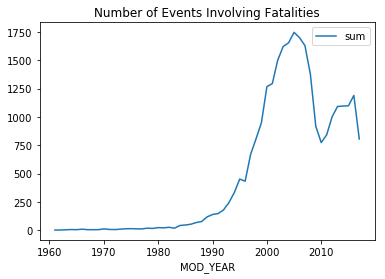

In [17]:
fatality_by_mod_yr.plot('MOD_YEAR', 'sum', title='Number of Events Involving Fatalities')

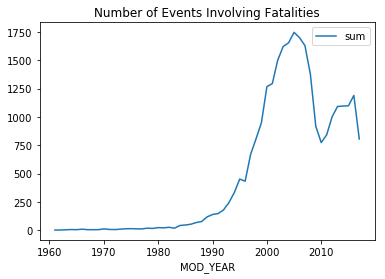

In [18]:
fatality_by_mod_yr.plot('MOD_YEAR', 'sum', title='Number of Events Involving Fatalities')

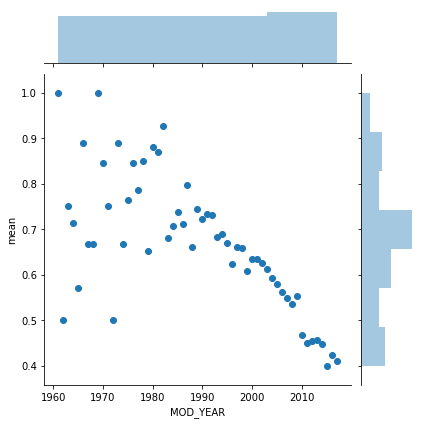

In [19]:
sns.jointplot(x=fatality_by_mod_yr['MOD_YEAR'], y=fatality_by_mod_yr['mean'], data=fatality_by_mod_yr, kind='scatter')

In [20]:
columns = vehicles.columns.values.tolist()

print(columns)

['STATE', 'ST_CASE', 'VEH_NO', 'VE_FORMS', 'NUMOCCS', 'DAY', 'MONTH', 'HOUR', 'MINUTE', 'HARM_EV', 'MAN_COLL', 'UNITTYPE', 'HIT_RUN', 'REG_STAT', 'OWNER', 'MAKE', 'MODEL', 'MAK_MOD', 'BODY_TYP', 'MOD_YEAR', 'VIN', 'VIN_1', 'VIN_2', 'VIN_3', 'VIN_4', 'VIN_5', 'VIN_6', 'VIN_7', 'VIN_8', 'VIN_9', 'VIN_10', 'VIN_11', 'VIN_12', 'TOW_VEH', 'J_KNIFE', 'MCARR_I1', 'MCARR_I2', 'MCARR_ID', 'GVWR', 'V_CONFIG', 'CARGO_BT', 'HAZ_INV', 'HAZ_PLAC', 'HAZ_ID', 'HAZ_CNO', 'HAZ_REL', 'BUS_USE', 'SPEC_USE', 'EMER_USE', 'TRAV_SP', 'UNDERIDE', 'ROLLOVER', 'ROLINLOC', 'IMPACT1', 'DEFORMED', 'TOWED', 'M_HARM', 'VEH_SC1', 'VEH_SC2', 'FIRE_EXP', 'DR_PRES', 'L_STATE', 'DR_ZIP', 'L_STATUS', 'L_TYPE', 'CDL_STAT', 'L_ENDORS', 'L_COMPL', 'L_RESTRI', 'DR_HGT', 'DR_WGT', 'PREV_ACC', 'PREV_SUS', 'PREV_DWI', 'PREV_SPD', 'PREV_OTH', 'FIRST_MO', 'FIRST_YR', 'LAST_MO', 'LAST_YR', 'SPEEDREL', 'DR_SF1', 'DR_SF2', 'DR_SF3', 'DR_SF4', 'VTRAFWAY', 'VNUM_LAN', 'VSPD_LIM', 'VALIGN', 'VPROFILE', 'VPAVETYP', 'VSURCOND', 'VTRAFCON',